To start running this jupyter file, make sure you install the required library by running below command:

pip install pandas\
pip install matplotlib\
pip install numpy\
pip install scikit-learn\
pip install seaborn\
pip install plotly\
pip install chart-studio\

In [297]:
#Import Library

import pandas as pd
import matplotlib
import numpy as np
import sklearn
import seaborn as sns

#graph & plot library
import plotly.graph_objects as go
import plotly.offline as pyoff
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.0.3
Matplotlib version: 3.7.1
NumPy version: 1.25.0
Scikit-learn version: 1.3.0
Seaborn version: 0.12.2


In [235]:
# Read CSV file
df = pd.read_csv('diabetes_2_missing_values.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0       1         1          1  40.0     1.0       0   
1                0       0         0          0  25.0     1.0       0   
2                0       1         1          1  28.0     0.0       0   
3                0       1         0          1  27.0     0.0       0   
4                0       1         1          1  24.0     0.0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0            0        5        18        15         1    0   9.0          4   
1            1        3         0         0         0    0   7.0          6   
2            1        5        30        30         1    0   9.0          4   
3            0        2         0         0         0    0  11.0          3   
4            0        2         3         0         0    0  11.0          5   

   Income  
0       3  
1       1  
2       8  
3       6  
4       4  

[5 rows x 22 columns]

In [236]:
# Checking Data structure
df.dtypes

Diabetes_binary           int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                     float64
Education                 int64
Income                    int64
dtype: object

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int64  
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  int64  
 15  

In [180]:
df.isnull().sum().sort_values(ascending=False) 

Diabetes_binary         0
HighBP                  0
Education               0
Age                     0
Sex                     0
DiffWalk                0
PhysHlth                0
MentHlth                0
GenHlth                 0
NoDocbcCost             0
AnyHealthcare           0
HvyAlcoholConsump       0
Veggies                 0
Fruits                  0
PhysActivity            0
HeartDiseaseorAttack    0
Stroke                  0
Smoker                  0
BMI                     0
CholCheck               0
HighChol                0
Income                  0
dtype: int64

In [181]:
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382210       0.442995       0.040571              0.094186   
std         6.608541       0.496741       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.031390       5.050434       6.053875  
std         0.496429       3.053259       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

**------------------------------------------------------------------------------------------------------------------

# *Explotary Data Analysis (EDA)*

**------------------------------------------------------------------------------------------------------------------

In [182]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'Income' column as the index
df_copy.set_index('Income', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Income' columns and calculate counts
grouped = df_copy.groupby(['Income', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Income',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Income',
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8],
        ticktext=["less $10k", 'less $20k', 'less $30k', 'less $34k', 'less $40k', 'less $50k', 'less $75k', 'over $75k']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)
# # Define the custom y-axis labels
# y_labels = []

# # Update the y-axis labels
# fig.update_yaxes(ticktext=y_labels, tickvals=grouped.index, tickangle=90)

# Show the plot using plotly.offline
fig.show()

In [183]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'HighBP' column as the index
df_copy.set_index('HighBP', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'HighBP' columns and calculate counts
grouped = df_copy.groupby(['HighBP', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by HighBP',
    xaxis_title='Number of people',
    yaxis=dict(
        title='HighBP',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()


In [184]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'HighChol' column as the index
df_copy.set_index('HighChol', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'HighChol' columns and calculate counts
grouped = df.groupby(['HighChol', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by HighChol',
    xaxis_title='Number of people',
    yaxis=dict(
        title='HighChol',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [185]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'CholCheck' column as the index
df_copy.set_index('CholCheck', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'CholCheck' columns and calculate counts
grouped = df.groupby(['CholCheck', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by CholCheck',
    xaxis_title='Number of people',
    yaxis=dict(
        title='CholCheck',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [186]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Smoker' columns and calculate counts
grouped = df.groupby(['Smoker', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Smoker',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Smoker',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [187]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'Stroke' column as the index
df_copy.set_index('Stroke', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Stroke' columns and calculate counts
grouped = df.groupby(['Stroke', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Stroke',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Stroke',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [188]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'HeartDiseaseorAttack' column as the index
df_copy.set_index('HeartDiseaseorAttack', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'HeartDiseaseorAttack' columns and calculate counts
grouped = df.groupby(['HeartDiseaseorAttack', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by HeartDiseaseorAttack',
    xaxis_title='Number of people',
    yaxis=dict(
        title='HeartDiseaseorAttack',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [189]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'PhysActivity' column as the index
df_copy.set_index('PhysActivity', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'PhysActivity' columns and calculate counts
grouped = df.groupby(['PhysActivity', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by PhysActivity',
    xaxis_title='Number of people',
    yaxis=dict(
        title='PhysActivity',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [190]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'Fruits' column as the index
df_copy.set_index('Fruits', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Fruits' columns and calculate counts
grouped = df.groupby(['Fruits', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Fruits Eater',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Fruits',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [191]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'Veggies' column as the index
df_copy.set_index('Veggies', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Veggies' columns and calculate counts
grouped = df.groupby(['Veggies', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Veggies Eater',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Veggies',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [192]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'HvyAlcoholConsump' column as the index
df_copy.set_index('HvyAlcoholConsump', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'HvyAlcoholConsump' columns and calculate counts
grouped = df.groupby(['HvyAlcoholConsump', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by HvyAlcoholConsump',
    xaxis_title='Number of people',
    yaxis=dict(
        title='HvyAlcoholConsump',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [193]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'AnyHealthcare' column as the index
df_copy.set_index('AnyHealthcare', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'AnyHealthcare' columns and calculate counts
grouped = df.groupby(['AnyHealthcare', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by AnyHealthcare',
    xaxis_title='Number of people',
    yaxis=dict(
        title='AnyHealthcare',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [194]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'AnyHealthcare' column as the index
df_copy.set_index('NoDocbcCost', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'NoDocbcCost' columns and calculate counts
grouped = df.groupby(['NoDocbcCost', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by NoDocbcCost',
    xaxis_title='Number of people',
    yaxis=dict(
        title='NoDocbcCost',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [195]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'GenHlth' column as the index
df_copy.set_index('GenHlth', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'GenHlth' columns and calculate counts
grouped = df.groupby(['GenHlth', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by GenHlth',
    xaxis_title='Number of people',
    yaxis=dict(
        title='GenHlth',
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5],
        ticktext=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [196]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'DiffWalk' column as the index
df_copy.set_index('DiffWalk', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'DiffWalk' columns and calculate counts
grouped = df.groupby(['DiffWalk', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by DiffWalk',
    xaxis_title='Number of people',
    yaxis=dict(
        title='DiffWalk',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No', 'Yes']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [197]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'Sex' column as the index
df_copy.set_index('Sex', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Sex' columns and calculate counts
grouped = df.groupby(['Sex', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Sex',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Sex',
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Female', 'Male']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)

# Show the plot using plotly.offline
fig.show()

In [198]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'Education' column as the index
df_copy.set_index('Education', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Education' columns and calculate counts
grouped = df.groupby(['Education', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Education',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Education',
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6],
        ticktext=['Never attended school or only kindergarten', 'Grades 1 through 8 (Elementary)', '3.Grades 9 through 11 (Some high school)', 
                  'Grade 12 or GED (High school graduate)' ,' College 1 year to 3 years (Some college or technical school)' ,
                  'College 4 years or more (College graduate)']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()

In [199]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Set the 'Education' column as the index
df_copy.set_index('Age', inplace=True)

# Select the 'Diabetes_binary' column and convert it to numeric if needed
df_copy['Diabetes_binary'] = pd.to_numeric(df_copy['Diabetes_binary'], errors='coerce')

# Group the data by 'Diabetes_binary' and 'Education' columns and calculate counts
grouped = df.groupby(['Age', 'Diabetes_binary']).size().unstack().fillna(0)

# Create the figure using plotly.graph_objects
fig = go.Figure()

# Add the 'No Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[0],
    orientation='h',
    name='No Diabetes',
    marker=dict(color='tomato')
))

# Add the 'Diabetes' bar trace
fig.add_trace(go.Bar(
    y=grouped.index,
    x=grouped[1],
    orientation='h',
    name='Diabetes',
    marker=dict(color='steelblue')
))

# Update the layout
fig.update_layout(
    title='Number of People with and without Diabetes by Age',
    xaxis_title='Number of people',
    yaxis=dict(
        title='Age',
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
        ticktext=['18-24', '25-29', '30-34', '35-39', '40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']
    ),
    legend_title='Diabetes',
    width=1000,
    height=800
)


# Show the plot using plotly.offline
fig.show()



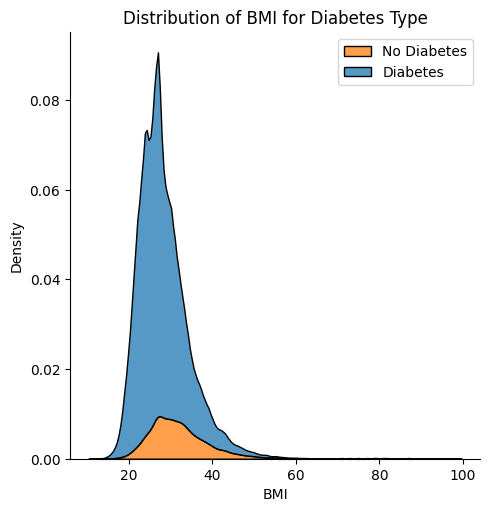

In [200]:
# Set the custom legend labels
legend_labels = ['No Diabetes', 'Diabetes']

# Create the density plot with stacked distributions
sns.displot(df, x="BMI", hue="Diabetes_binary", kind="kde", multiple="stack", legend=False)

# Set the custom legend labels
plt.legend(legend_labels)

# Set the plot title
plt.title('Distribution of BMI for Diabetes Type')

# Show the plot
plt.show()

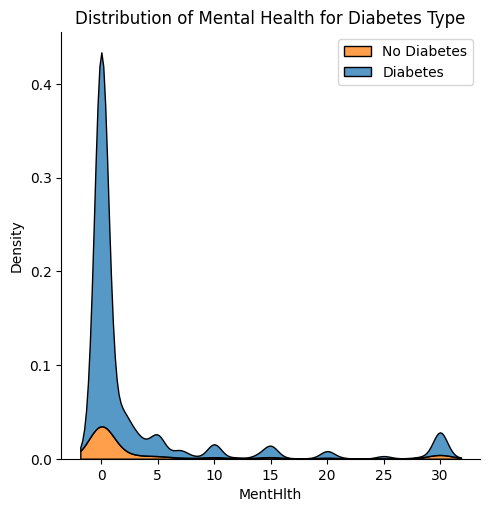

In [201]:
# Set the custom legend labels
legend_labels = ['No Diabetes', 'Diabetes']

# Create the density plot with stacked distributions
sns.displot(df, x="MentHlth", hue="Diabetes_binary", kind="kde", multiple="stack", legend=False)

# Set the custom legend labels
plt.legend(legend_labels)

# Set the plot title
plt.title('Distribution of Mental Health for Diabetes Type')

# Show the plot
plt.show()

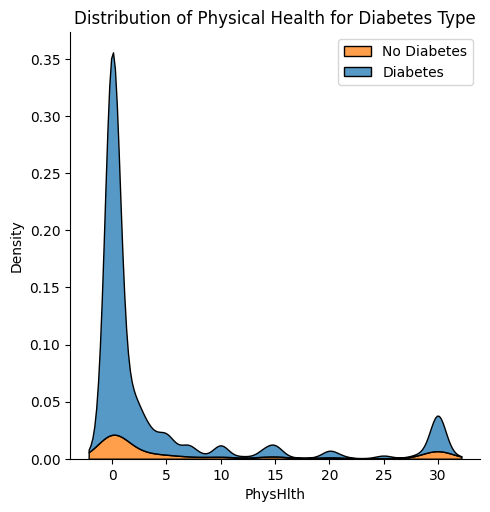

In [202]:
# Set the custom legend labels
legend_labels = ['No Diabetes', 'Diabetes']

# Create the density plot with stacked distributions
sns.displot(df, x="PhysHlth", hue="Diabetes_binary", kind="kde", multiple="stack", legend=False)

# Set the custom legend labels
plt.legend(legend_labels)

# Set the plot title
plt.title('Distribution of Physical Health for Diabetes Type')

# Show the plot
plt.show()

# *******************************************************************

# **DATA PREPROCESSING**

# *******************************************************************

### **Replace Missing Values**

1) Display the data that is null or NAN for BMI column

In [261]:
# creating bool series True for NaN values
bool_series = pd.isnull(df["BMI"])

# filtering data
# displaying data only with BMI = NaN
df[bool_series]

Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
9                 0       0         0          1  NaN     0.0       0   
10                1       0         0          1  NaN     1.0       0   
11                0       1         1          1  NaN     1.0       0   
12                0       0         0          1  NaN     1.0       0   
13                1       1         1          1  NaN     0.0       0   
14                0       0         1          1  NaN     1.0       1   
15                0       1         0          1  NaN     0.0       0   
16                0       1         1          1  NaN     0.0       0   
17                1       0         0          1  NaN     1.0       0   
18                0       0         0          0  NaN     0.0       0   
19                0       0         1          1  NaN     0.0       0   
20                0       1         1          1  NaN     0.0       1   
21                0       1         1          1  NaN     1.0       0   
22                0       0         0          1  NaN     1.0       0   
23                1       1         0          1  NaN     0.0       0   
24                0       1         1          1  NaN     1.0       0   
25                0       0         0          1  NaN     0.0       0   
26                1       1         1          1  NaN     1.0       1   
27                1       1         1          1  NaN     1.0       0   
28                1       1         1          1  NaN     1.0       0   
29                0       0         1          1  NaN     1.0       0   
30                1       1         1          1  NaN     1.0       1   
31                0       1         0          1  NaN     1.0       0   
32                0       0         0          1  NaN     0.0       0   
33                0       1         0          1  NaN     0.0       0   
34                1       1         1          1  NaN     1.0       0   

    HeartDiseaseorAttack  GenHlth  MentHlth  PhysHlth  DiffWalk   Age  
9                      0        2         0         0         0   8.0  
10                     0        3         0         0         0  13.0  
11                     0        3         0        30         1  10.0  
12                     0        3         0        15         0   7.0  
13                     0        4         0         0         1  11.0  
14                     0        4        30        28         0   4.0  
15                     0        2         5         0         0   6.0  
16                     0        3         0         0         0  10.0  
17                     0        2         0         0         0   7.0  
18                     0        2        15         0         0   2.0  
19                     0        2        10         0         0   4.0  
20                     1        3        30         0         1  12.0  
21                     0        5        15        30         1  13.0  
22                     0        3         0         7         0   5.0  
23                     0        1         0         0         0  13.0  
24                     0        3         6         0         1   9.0  
25                     0        2         0         0         0   5.0  
26                     1        5         0         0         1  10.0  
27                     1        4         0         0         0  12.0  
28                     0        4        20        20         1   8.0  
29                     0        1         0         0         0  12.0  
30                     0        4         0         7         1   9.0  
31                     0        1         0         0         1  13.0  
32                     0        1         2         0         0   6.0  
33                     0        3         0         0         0  11.0  
34                     0        2         0         0         0  12.0

2) Display the data that is null or NAN for Smoker column

In [262]:
# creating bool series True for NaN values
bool_series_smoker = pd.isnull(df["Smoker"])

# filtering data
# displaying data only with Smoker = NaN
df[bool_series_smoker]

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
60                 1       1         0          1  27.0     NaN       0   
61                 0       1         0          1  27.0     NaN       0   
62                 0       1         0          1  34.0     NaN       0   
63                 0       1         1          1  30.0     NaN       0   
64                 0       1         1          1  27.0     NaN       0   
..               ...     ...       ...        ...   ...     ...     ...   
136                0       0         1          1  27.0     NaN       0   
137                0       1         1          1  31.0     NaN       0   
138                0       0         0          1  23.0     NaN       0   
139                0       1         1          1  28.0     NaN       1   
140                0       0         0          1  26.0     NaN       0   

     HeartDiseaseorAttack  GenHlth  MentHlth  PhysHlth  DiffWalk   Age  
60                      0        3         0         0         0  11.0  
61                      0        4         0         5         1  11.0  
62                      0        3         0         0         0   9.0  
63                      0        3         5         1         0   7.0  
64                      0        4        30        30         1  10.0  
..                    ...      ...       ...       ...       ...   ...  
136                     0        2         0         0         0   5.0  
137                     0        4         1         6         1   9.0  
138                     0        3        10         6         0   1.0  
139                     0        5         8        10         1   9.0  
140                     0        3         0         0         0  11.0  

[81 rows x 13 columns]

In [263]:
# creating bool series True for NaN values
bool_series_age = pd.isnull(df["Age"])

# filtering data
# displaying data only with Smoker = NaN
df[bool_series_age]

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
193                0       0         0          1  29.0     0.0       0   
194                1       1         1          1  29.0     1.0       1   
195                0       0         1          1  27.0     0.0       0   
196                0       0         0          1  21.0     0.0       0   
197                0       0         0          1  28.0     0.0       0   
..               ...     ...       ...        ...   ...     ...     ...   
378                0       0         0          1  26.0     0.0       0   
379                0       0         1          1  27.0     1.0       0   
380                1       1         0          1  34.0     1.0       1   
381                0       1         0          1  43.0     0.0       0   
382                0       1         1          1  30.0     0.0       0   

     HeartDiseaseorAttack  GenHlth  MentHlth  PhysHlth  DiffWalk  Age  
193                     0        3         0         0         0  NaN  
194                     1        4        15        15         0  NaN  
195                     0        2         4         1         0  NaN  
196                     0        2         0         0         0  NaN  
197                     0        2         5         2         0  NaN  
..                    ...      ...       ...       ...       ...  ...  
378                     0        1         0         1         0  NaN  
379                     0        2         0         0         0  NaN  
380                     0        4         3        30         1  NaN  
381                     0        4         0         0         0  NaN  
382                     0        3         0        15         1  NaN  

[190 rows x 13 columns]

3) Replace the missing value for BMI using median and replace the missing values for Smoker and Age using mode

In [298]:
# Calculate median for BMI and Age
median_bmi = df['BMI'].median()
median_age = df['Age'].median()

# Calculate mode for Smoker
mode_smoker = df['Smoker'].mode().iloc[0]

# Calculate mode for Age
mode_age = df['Age'].mode().iloc[0]

# Replace missing values with median and mode
df['BMI'].fillna(median_bmi, inplace=True)
df['Age'].fillna(mode_age, inplace=True)
df['Smoker'].fillna(mode_smoker, inplace=True)

# Save the updated DataFrame back to the CSV file
# df.to_csv('diabetes_2_missing_values.csv', index=False)

print("Median BMI: ",median_bmi)
print("Median Age: ",mode_age)
print("Mode Smoker: ",median_bmi)

Median BMI:  27.0
Median Age:  9.0
Mode Smoker:  27.0


4) Recheck the file is missing values is fix

In [265]:
df.isnull().sum().sort_values(ascending=False) 

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
dtype: int64

### **Remove Dupplicate**

In [243]:
# occurrence based on all columns
duplicate_rows = df[df.duplicated(keep=False)]
 
# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5                     0       1         1          1  25.0     1.0       0   
44                    0       0         1          1  31.0     1.0       0   
52                    1       1         1          1  27.0     1.0       0   
53                    0       0         0          1  31.0     0.0       0   
57                    0       0         1          1  24.0     1.0       0   
...                 ...     ...       ...        ...   ...     ...     ...   
253492                1       1         1          1  33.0     0.0       0   
253550                0       0         0          1  25.0     0.0       0   
253563                0       0         1          1  24.0     1.0       0   
253597                0       0         0          1  24.0     0.0       0   
253638                0       0         0          1  24.0     0.0       0   

        HeartDiseaseorAttack  PhysActivity  Fru

In [244]:
# Drop duplicate rows in place
df.drop_duplicates(inplace=True)

### **Remove Outliers**

Check and remove outlier for BMI

In [249]:
df = df.reset_index(drop=True)
fig = px.box(df, y="BMI")
fig.show()

In [248]:
# Calculate the IQR for the 'BMI' column
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define the IQR threshold for outlier detection
threshold = 1.5

# Remove rows with 'BMI' values outside the IQR range
df = df[~((df['BMI'] < (Q1 - threshold * IQR)) | (df['BMI'] > (Q3 + threshold * IQR)))]

### **Balance Dataset**

In [250]:
print(df['Diabetes_binary'].value_counts())

Diabetes_binary
0    190754
1     33101
Name: count, dtype: int64


Text(0.5, 1.0, 'Barplot of Diabetes')

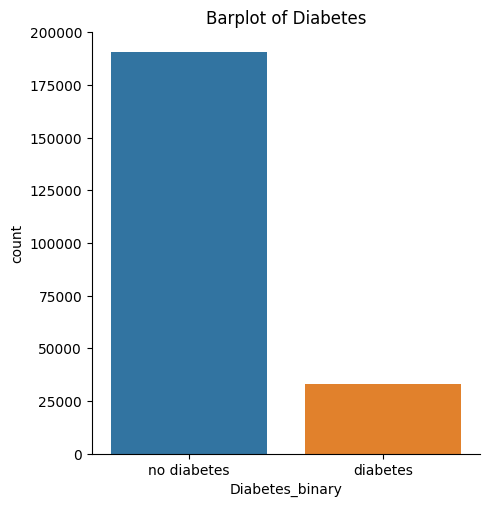

In [251]:
sns.catplot(x="Diabetes_binary", kind='count', data=df)
plt.xticks([0,1],['no diabetes','diabetes'])
plt.title('Barplot of Diabetes')

Balance the dataset using resample function

Text(0.5, 1.0, 'Barplot of Diabetes')

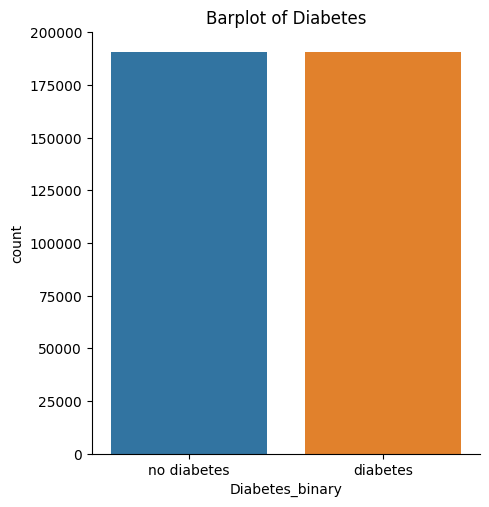

In [254]:
# Separate majority and minority classes
df_majority = df[df.Diabetes_binary== 0]
df_minority = df[df.Diabetes_binary== 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
sns.catplot(x="Diabetes_binary", kind='count', data=df_upsampled)
plt.xticks([0,1],['no diabetes','diabetes'])
plt.title('Barplot of Diabetes')

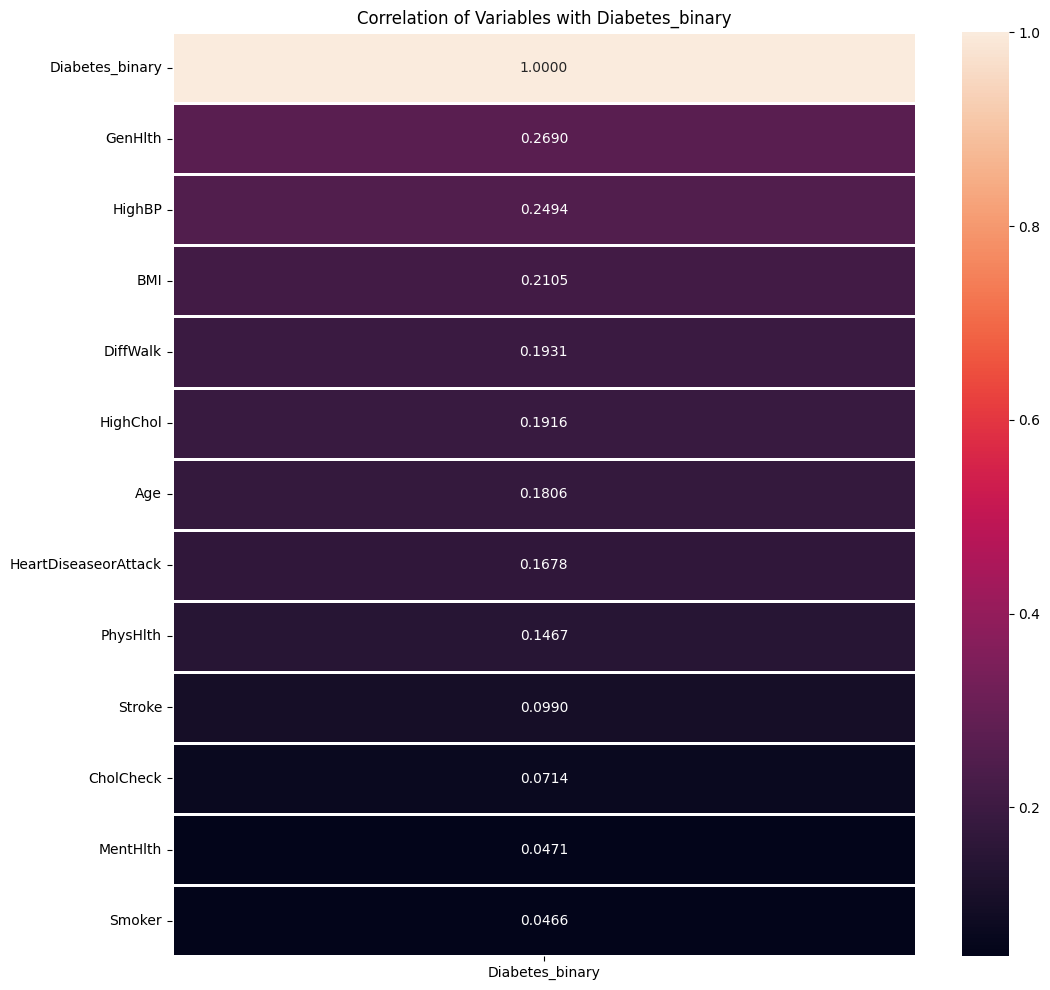

In [259]:
# Set the 'event_type' column as the target variable
target_variable = 'Diabetes_binary'

# set the plot size
plt.figure(figsize=(12, 12))

matrix = df.corr()[[target_variable]].round(4)

# sorted the correlation value
sorted_matrix = matrix.sort_values(by=target_variable, ascending=False)
sns.heatmap(sorted_matrix, annot=True, fmt=".4f", linewidths=2)

# set the heatmap title
plt.title(f"Correlation of Variables with {target_variable}")

plt.show()

In [258]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the columns based on the correlation coefficient
selected_columns = correlation_matrix[correlation_matrix[target_variable].round(4) > 0.04].index

# Remove the target variable from the selected columns
selected_columns = selected_columns.drop(target_variable)

# Add the target variable to the selected columns
selected_columns = selected_columns.insert(0, target_variable)

# Create a new dataframe with the selected columns
df_filtered = df[selected_columns]

# Overwrite the existing dataframe with the filtered dataframe
df = df_filtered

# Display the updated dataframe
print(df_filtered)

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                     0       1         1          1  40.0     1.0       0   
1                     0       0         0          0  25.0     1.0       0   
2                     0       1         1          1  28.0     0.0       0   
3                     0       1         0          1  27.0     0.0       0   
4                     0       1         1          1  24.0     0.0       0   
...                 ...     ...       ...        ...   ...     ...     ...   
223850                0       0         0          1  27.0     0.0       0   
223851                1       1         1          1  18.0     0.0       0   
223852                0       0         0          1  28.0     0.0       0   
223853                0       1         0          1  23.0     0.0       0   
223854                1       1         1          1  25.0     0.0       0   

        HeartDiseaseorAttack  GenHlth  MentHlth  PhysHlth  Diff

# **MACHINE LEARNING KNN**

In [266]:
# storing the input values in the X variable
X = df.iloc[:,1:].values
# storing all the ouputs in y variable
y = df.iloc[:,0].values

# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# applying standard scale method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 5
KNN_classifier = KNeighborsClassifier(n_neighbors=5)

# model training
KNN_classifier.fit(X_train,y_train)

# testing the model
y_pred= KNN_classifier.predict(X_test)

# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
knn_accuracy = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.8357642223760917


In [96]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from mlxtend.feature_selection import SequentialFeatureSelector

# # storing the input values in the X variable
# X = df.iloc[:, 1:].values
# # storing all the outputs in y variable
# y = df.iloc[:, 0].values

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create the KNN classifier
# knn = KNeighborsClassifier(n_neighbors=3)

# # Create the SequentialFeatureSelector object with the KNN classifier
# sfs = SequentialFeatureSelector(estimator=knn, k_features=15, forward=True, scoring='accuracy', cv=5)

# # Perform forward feature selection
# X_train_sfs = sfs.fit_transform(X_train_scaled, y_train)
# X_test_sfs = sfs.transform(X_test_scaled)

# # Get the selected feature indices
# selected_feature_indices = sfs.k_feature_idx_
# print("Selected Feature Indices:", selected_feature_indices)

# # Get the selected feature names
# selected_features = df.columns[1:][np.array(selected_feature_indices)]
# print("Selected Features:", selected_features)

# # Fit the KNN classifier on the selected features
# knn.fit(X_train_sfs, y_train)

# # Predict on the test set
# y_pred = knn.predict(X_test_sfs)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


Selected Feature Indices: (0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17)
Selected Features: Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'PhysHlth', 'DiffWalk',
       'Sex'],
      dtype='object')
Accuracy: 0.7166666666666667


[[36072  2050]
 [ 5303  1346]]


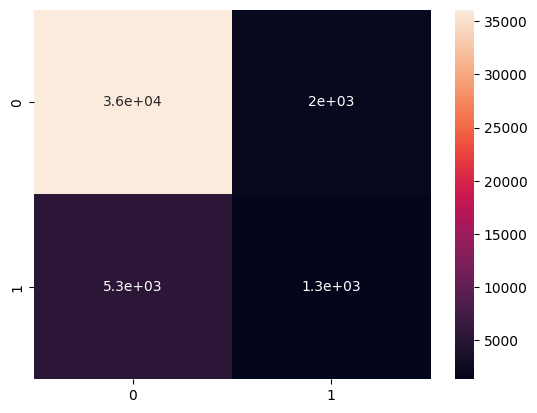

In [267]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
#plt.savefig('confusion_Matrix.png')

print(cm)

In [274]:
# finding the whole report
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, y_pred, digits=4)
print(report)

# Split the report by newlines
lines = report.split('\n')

# Find the line containing the overall metrics
overall_metrics_line = lines[-2]

# Split the line by spaces
metrics = overall_metrics_line.split()

# Extract the precision, recall, and F1-score
knn_precision = float(metrics[2])
knn_recall = float(metrics[3])
knn_f1_score = float(metrics[4])

# Print the overall metrics
print("Overall Precision:", knn_precision)
print("Overall Recall:", knn_recall)
print("Overall F1-score:", knn_f1_score)

              precision    recall  f1-score   support

           0     0.8732    0.9139    0.8931     38159
           1     0.3204    0.2341    0.2705      6612

    accuracy                         0.8135     44771
   macro avg     0.5968    0.5740    0.5818     44771
weighted avg     0.7916    0.8135    0.8012     44771

Overall Precision: 0.7916
Overall Recall: 0.8135
Overall F1-score: 0.8012


# **MACHINE LEARNING NAIVE BAYES**

In [276]:
#training and testing data
from sklearn.model_selection import train_test_split

#assign test data size 80%(testing)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

#importing standard scaler
from sklearn.preprocessing import StandardScaler

#scalling the input data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

#training the model using BERNOULLI NAIVE BAYES CLASSIFIER
#import classifier
from sklearn.naive_bayes import BernoulliNB

#initializating the NB
nb_classifier = BernoulliNB()

#training the model
nb_classifier.fit (x_train,y_train)

#testing the model
y_pred = nb_classifier.predict(x_test)

#importing accuracy score
from sklearn.metrics import accuracy_score

#printing the accuracy of the model
nb_accuracy = accuracy_score(y_pred, y_test)
print(nb_accuracy)

0.8149764835767938


[[118216  15239]
 [ 13754   9490]]


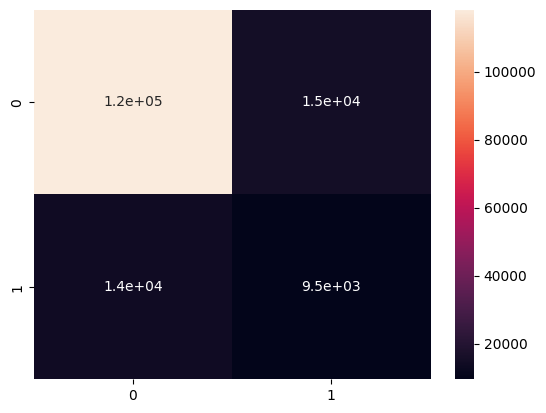

In [269]:
#evaluation of BERNOULLI NAIVE BAYES CLASSIFIER

#importing the require modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

#passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

#true write data values in each cell of the matrix
sns.heatmap(cm, annot = True)

print(cm)

In [277]:
# finding the whole report
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, y_pred, digits=4)
print(report)

# Split the report by newlines
lines = report.split('\n')

# Find the line containing the overall metrics
overall_metrics_line = lines[-2]

# Split the line by spaces
metrics = overall_metrics_line.split()

# Extract the precision, recall, and F1-score
nb_precision = float(metrics[2])
nb_recall = float(metrics[3])
nb_f1_score = float(metrics[4])

# Print the overall metrics
print("Overall Precision:", nb_precision)
print("Overall Recall:", nb_recall)
print("Overall F1-score:", nb_f1_score)

              precision    recall  f1-score   support

           0     0.8958    0.8858    0.8908    133455
           1     0.3838    0.4083    0.3956     23244

    accuracy                         0.8150    156699
   macro avg     0.6398    0.6470    0.6432    156699
weighted avg     0.8198    0.8150    0.8173    156699

Overall Precision: 0.8198
Overall Recall: 0.815
Overall F1-score: 0.8173


# **MACHINE LEARNING DECISION TREE**

In [278]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

#scalling the input data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# Train Decision Tree Classifer
dt_classifier = dt_classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_classifier.predict(X_test)

# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
dt_accuracy = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.8126242433718255


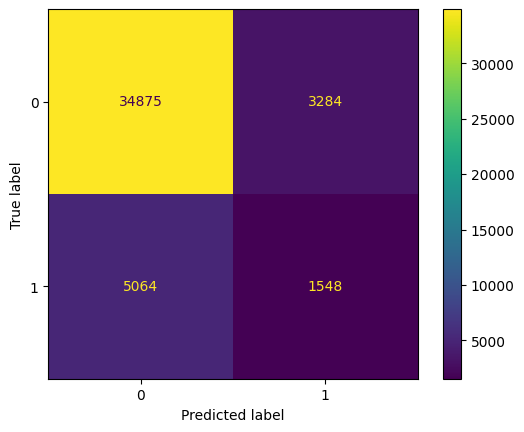

In [271]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred,labels=dt_classifier.classes_)

# Plot the confusion matrix with labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)
disp.plot()

In [289]:
# finding the whole report
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, y_pred, digits=4)
print(report)

# Split the report by newlines
lines = report.split('\n')

# Find the line containing the overall metrics
overall_metrics_line = lines[-2]

# Split the line by spaces
metrics = overall_metrics_line.split()

# Extract the precision, recall, and F1-score
dt_precision = float(metrics[2])
dt_recall = float(metrics[3])
dt_f1_score = float(metrics[4])

# Print the overall metrics
print("Overall Precision:", dt_precision)
print("Overall Recall:", dt_recall)
print("Overall F1-score:", dt_f1_score)

              precision    recall  f1-score   support

           0     0.8731    0.9129    0.8925     38159
           1     0.3177    0.2341    0.2696      6612

    accuracy                         0.8126     44771
   macro avg     0.5954    0.5735    0.5810     44771
weighted avg     0.7911    0.8126    0.8005     44771

Overall Precision: 0.7911
Overall Recall: 0.8126
Overall F1-score: 0.8005


In [291]:
import pickle

# Dictionary to store model results
model_results = {}

if dt_accuracy > nb_accuracy and dt_accuracy > knn_accuracy:
    # Save the Decision model
    model_name = 'Decision Tree'
    model = dt_classifier
    accuracy = dt_accuracy
    precision = dt_precision
    f1score = dt_f1_score
    recall = dt_recall
    print("Decision model saved with accuracy:", decision_accuracy)
elif nb_accuracy > dt_accuracy and nb_accuracy > knn_accuracy:
    # Save the Naive Bayes model
    model_name = 'Naive Bayes'
    model = nb_classifier
    accuracy = nb_accuracy
    precision = nb_precision
    f1score = nb_f1_score
    recall = nb_recall
    print("Naive Bayes model saved with accuracy:", nb_accuracy)
else:
    # Save the KNN model
    model_name = 'KNN'
    model = KNN_classifier
    accuracy = knn_accuracy
    precision = knn_precision
    f1score = knn_f1_score
    recall = knn_recall
    print("KNN model saved with accuracy:", knn_accuracy)

# Save the model
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# Store model results in dictionary
model_results = {
    'accuracy': accuracy,
    'precision': precision,
    'f1score': f1score,
    'recall': recall,
    'model_name': model_name,
    'knn': {
        'accuracy': knn_accuracy,
        'precision': knn_precision,
        'f1score': knn_f1_score,
        'recall': knn_recall,
    },
    'dt': {
        'accuracy': dt_accuracy,
        'precision': dt_precision,
        'f1score': dt_f1_score,
        'recall': dt_recall,
    },
    'nb': {
        'accuracy': nb_accuracy,
        'precision': nb_precision,
        'f1score': nb_f1_score,
        'recall': nb_recall,
    }
}

# Save accuracy and precision separately
pickle.dump(model_results, open('model_results.sav', 'wb'))

# Save individual models
pickle.dump(nb_classifier, open('NB.sav', 'wb')) 
pickle.dump(dt_classifier, open('DT.sav', 'wb'))
pickle.dump(KNN_classifier, open('KNN.sav', 'wb'))

KNN model saved with accuracy: 0.8357642223760917
